In [1]:
import pandas as pd

train=pd.read_csv('train_oe_br_hr.csv')

In [5]:
x=len(train.columns)

<AxesSubplot:>

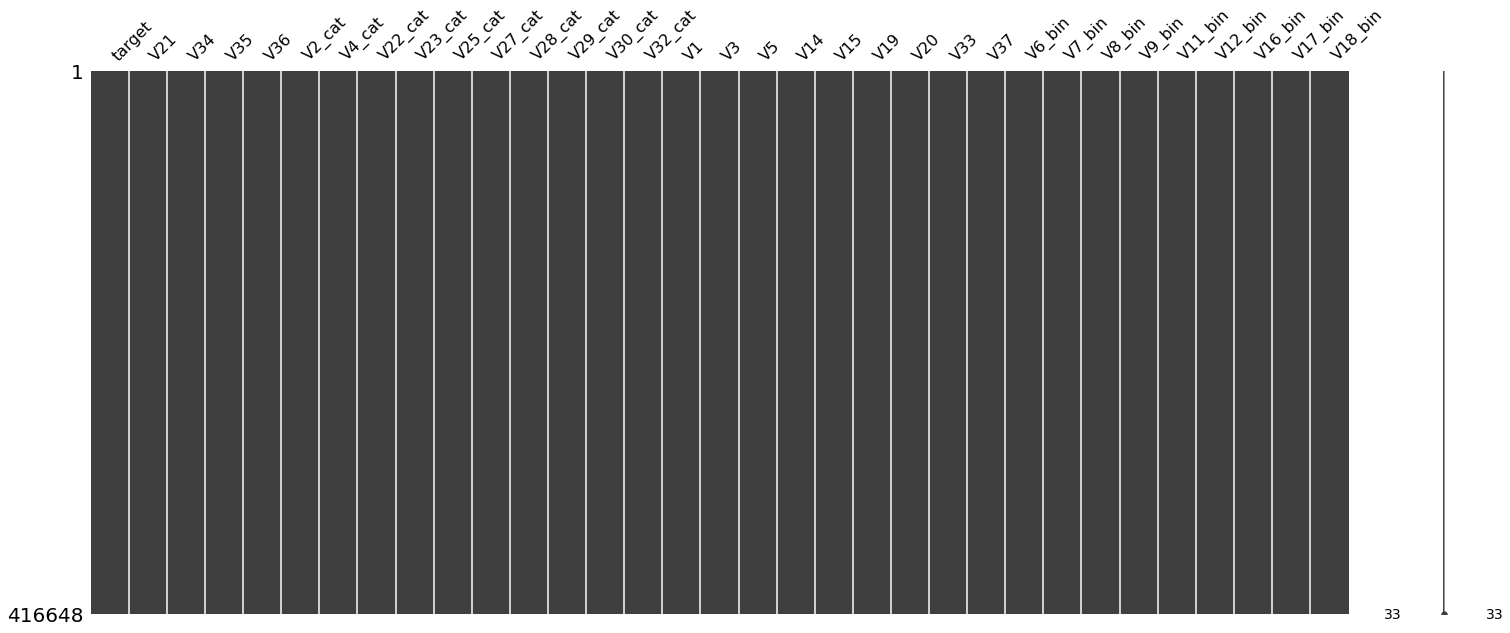

In [3]:
import missingno as msno

msno.matrix(train)

범주형 변수 시각화

In [6]:
train=train.dropna(axis=0)
target=train['target']
del train['target']
#del train['id']

train.columns

Index(['V21', 'V34', 'V35', 'V36', 'V2_cat', 'V4_cat', 'V22_cat', 'V23_cat',
       'V25_cat', 'V27_cat', 'V28_cat', 'V29_cat', 'V30_cat', 'V32_cat', 'V1',
       'V3', 'V5', 'V14', 'V15', 'V19', 'V20', 'V33', 'V37', 'V6_bin',
       'V7_bin', 'V8_bin', 'V9_bin', 'V11_bin', 'V12_bin', 'V16_bin',
       'V17_bin', 'V18_bin'],
      dtype='object')

In [ ]:
train['V1'] = train['V1'].astype(int)
train['V2_cat'] = pd.Categorical(train.V2_cat)
train['V3'] = train['V3'].astype(int)
train['V4_cat'] = pd.Categorical(train.V4_cat)
train['V5'] = train['V5'].astype(int)
train['V6_bin'] = pd.Categorical(train.V6_bin)
train['V7_bin'] = pd.Categorical(train.V7_bin)
train['V8_bin'] = pd.Categorical(train.V8_bin)
train['V9_bin'] = pd.Categorical(train.V9_bin)
train['V10_bin'] = pd.Categorical(train.V10_bin)
train['V11_bin'] = pd.Categorical(train.V11_bin)
train['V12_bin'] = pd.Categorical(train.V12_bin)
train['V13_bin'] = pd.Categorical(train.V13_bin)
train['V14'] = train['V14'].astype(int)
train['V15'] = train['V15'].astype(int)
train['V16_bin'] = pd.Categorical(train.V16_bin)
train['V17_bin'] = pd.Categorical(train.V17_bin)
train['V18_bin'] = pd.Categorical(train.V18_bin)
# train['V19'] = train['V19'].astype(int)
# train['V20'] = train['V20'].astype(int)
train['V22_cat'] = pd.Categorical(train.V22_cat)
train['V23_cat'] = pd.Categorical(train.V23_cat)
train['V25_cat'] = pd.Categorical(train.V25_cat)
train['V27_cat'] = pd.Categorical(train.V27_cat)
train['V28_cat'] = pd.Categorical(train.V28_cat)
train['V29_cat'] = pd.Categorical(train.V29_cat)
train['V30_cat'] = pd.Categorical(train.V30_cat)
train['V31_cat'] = pd.Categorical(train.V31_cat)
train['V32_cat'] = pd.Categorical(train.V32_cat)
train['V41'] = train['V41'].astype(int)
train['V42'] = train['V42'].astype(int)
train['V43'] = train['V43'].astype(int)
train['V44'] = train['V44'].astype(int)
train['V45'] = train['V45'].astype(int)
train['V47'] = train['V47'].astype(int)
train['V48'] = train['V48'].astype(int)
train['V49'] = train['V49'].astype(int)
train['V50'] = train['V50'].astype(int)
train['V51'] = train['V51'].astype(int)
train['V52_cat'] = pd.Categorical(train.V52_bin)
train['V53_cat'] = pd.Categorical(train.V53_bin)
train['V54_cat'] = pd.Categorical(train.V54_bin)
train['V55_cat'] = pd.Categorical(train.V55_bin)
train['V56_cat'] = pd.Categorical(train.V56_bin)
train['V57_cat'] = pd.Categorical(train.V57_bin)
target = pd.Categorical(target)

In [7]:
from sklearn.feature_selection import SelectKBest,f_regression

In [7]:
selector=SelectKBest(score_func=f_regression,k=len(train.columns))
selected=selector.fit_transform(train,target)
all_names=train.columns
selected_mask=selector.get_support()
selected_names=all_names[selected_mask]

In [13]:
from sklearn.feature_selection import SelectKBest,f_classif

selector2=SelectKBest(score_func=f_classif,k=13)
selected2=selector2.fit_transform(train,target)
all_names2=train.columns
selected_mask2=selector2.get_support()
selected_names2=all_names2[selected_mask2]
print(selected_names2)

Index(['V21', 'V34', 'V35', 'V23_cat', 'V25_cat', 'V5', 'V19', 'V20', 'V37',
       'V6_bin', 'V7_bin', 'V16_bin', 'V17_bin'],
      dtype='object')


In [11]:
scores2=pd.DataFrame()
scores2['f_classif']=selector2.scores_
scores2['support']=selector2.get_support()
scores2['feature']=train.columns
x2=scores2[scores2['support']==True]
x2=x2.sort_values('f_classif',ascending=True)
x2['ratio']=x2['f_classif']/sum(x2['f_classif'])
x2

,f_classif,support,feature,ratio
21,0.755999,True,V33,0.000097
27,4.546270,True,V11_bin,0.000584
12,12.573581,True,V30_cat,0.001614
4,13.077520,True,V2_cat,0.001679
13,13.173678,True,V32_cat,0.001691
31,14.132364,True,V18_bin,0.001814
26,21.178817,True,V9_bin,0.002719
17,28.844302,True,V14,0.003703
28,29.257396,True,V12_bin,0.003756
15,34.789422,True,V3,0.004466


Text(0.5, 1.0, 'Feature Importance by SelectKBest-fclassif')

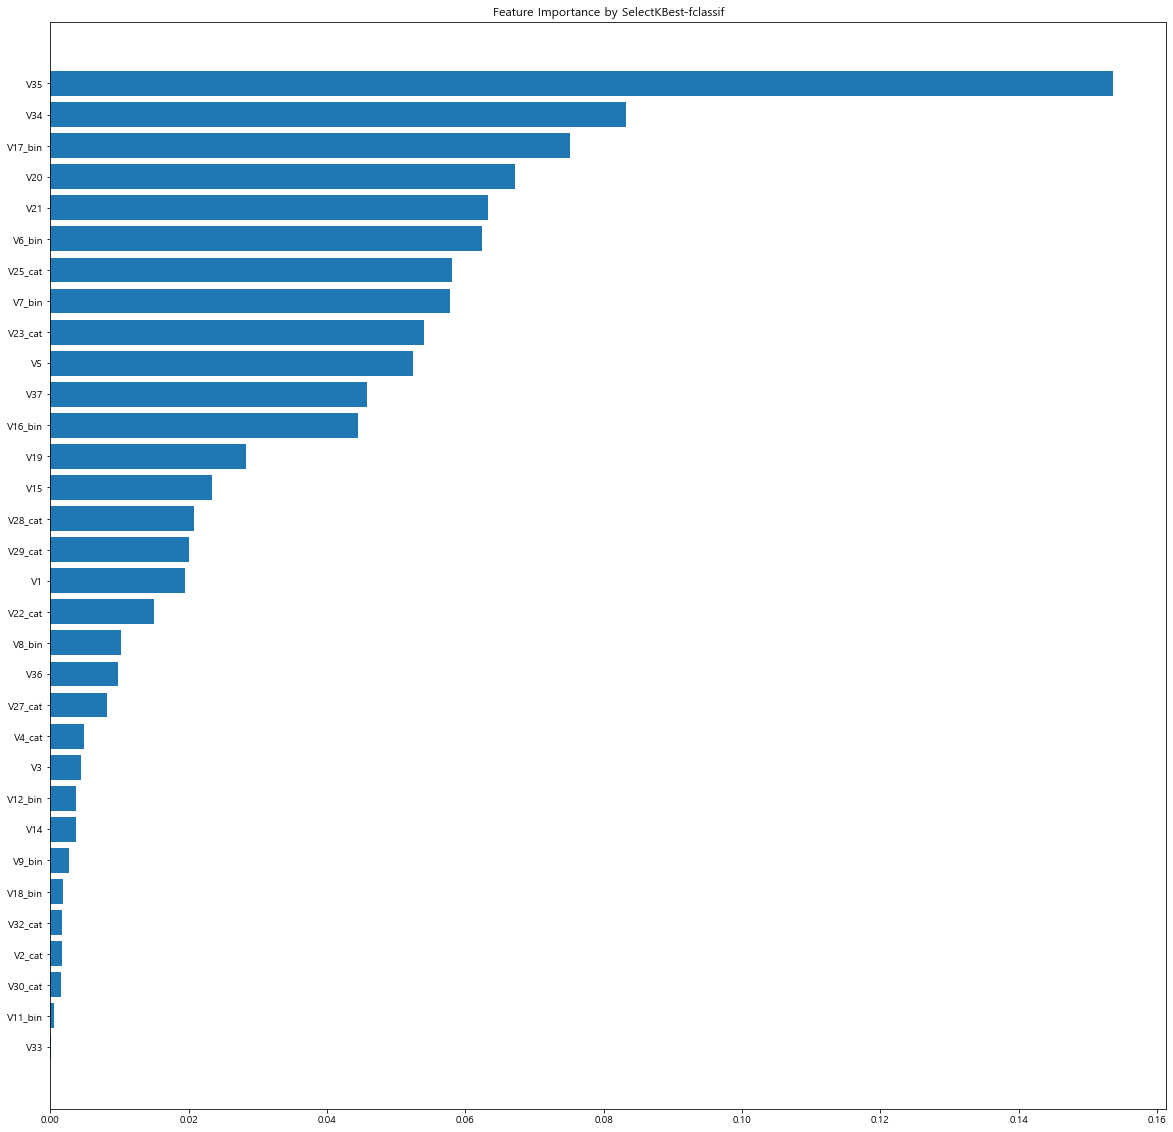

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False
feature=x2['feature']
score=x2['ratio']

plt.rcParams['figure.figsize'] = [20, 20]
plt.barh(feature,score)
plt.title('Feature Importance by SelectKBest-fclassif')

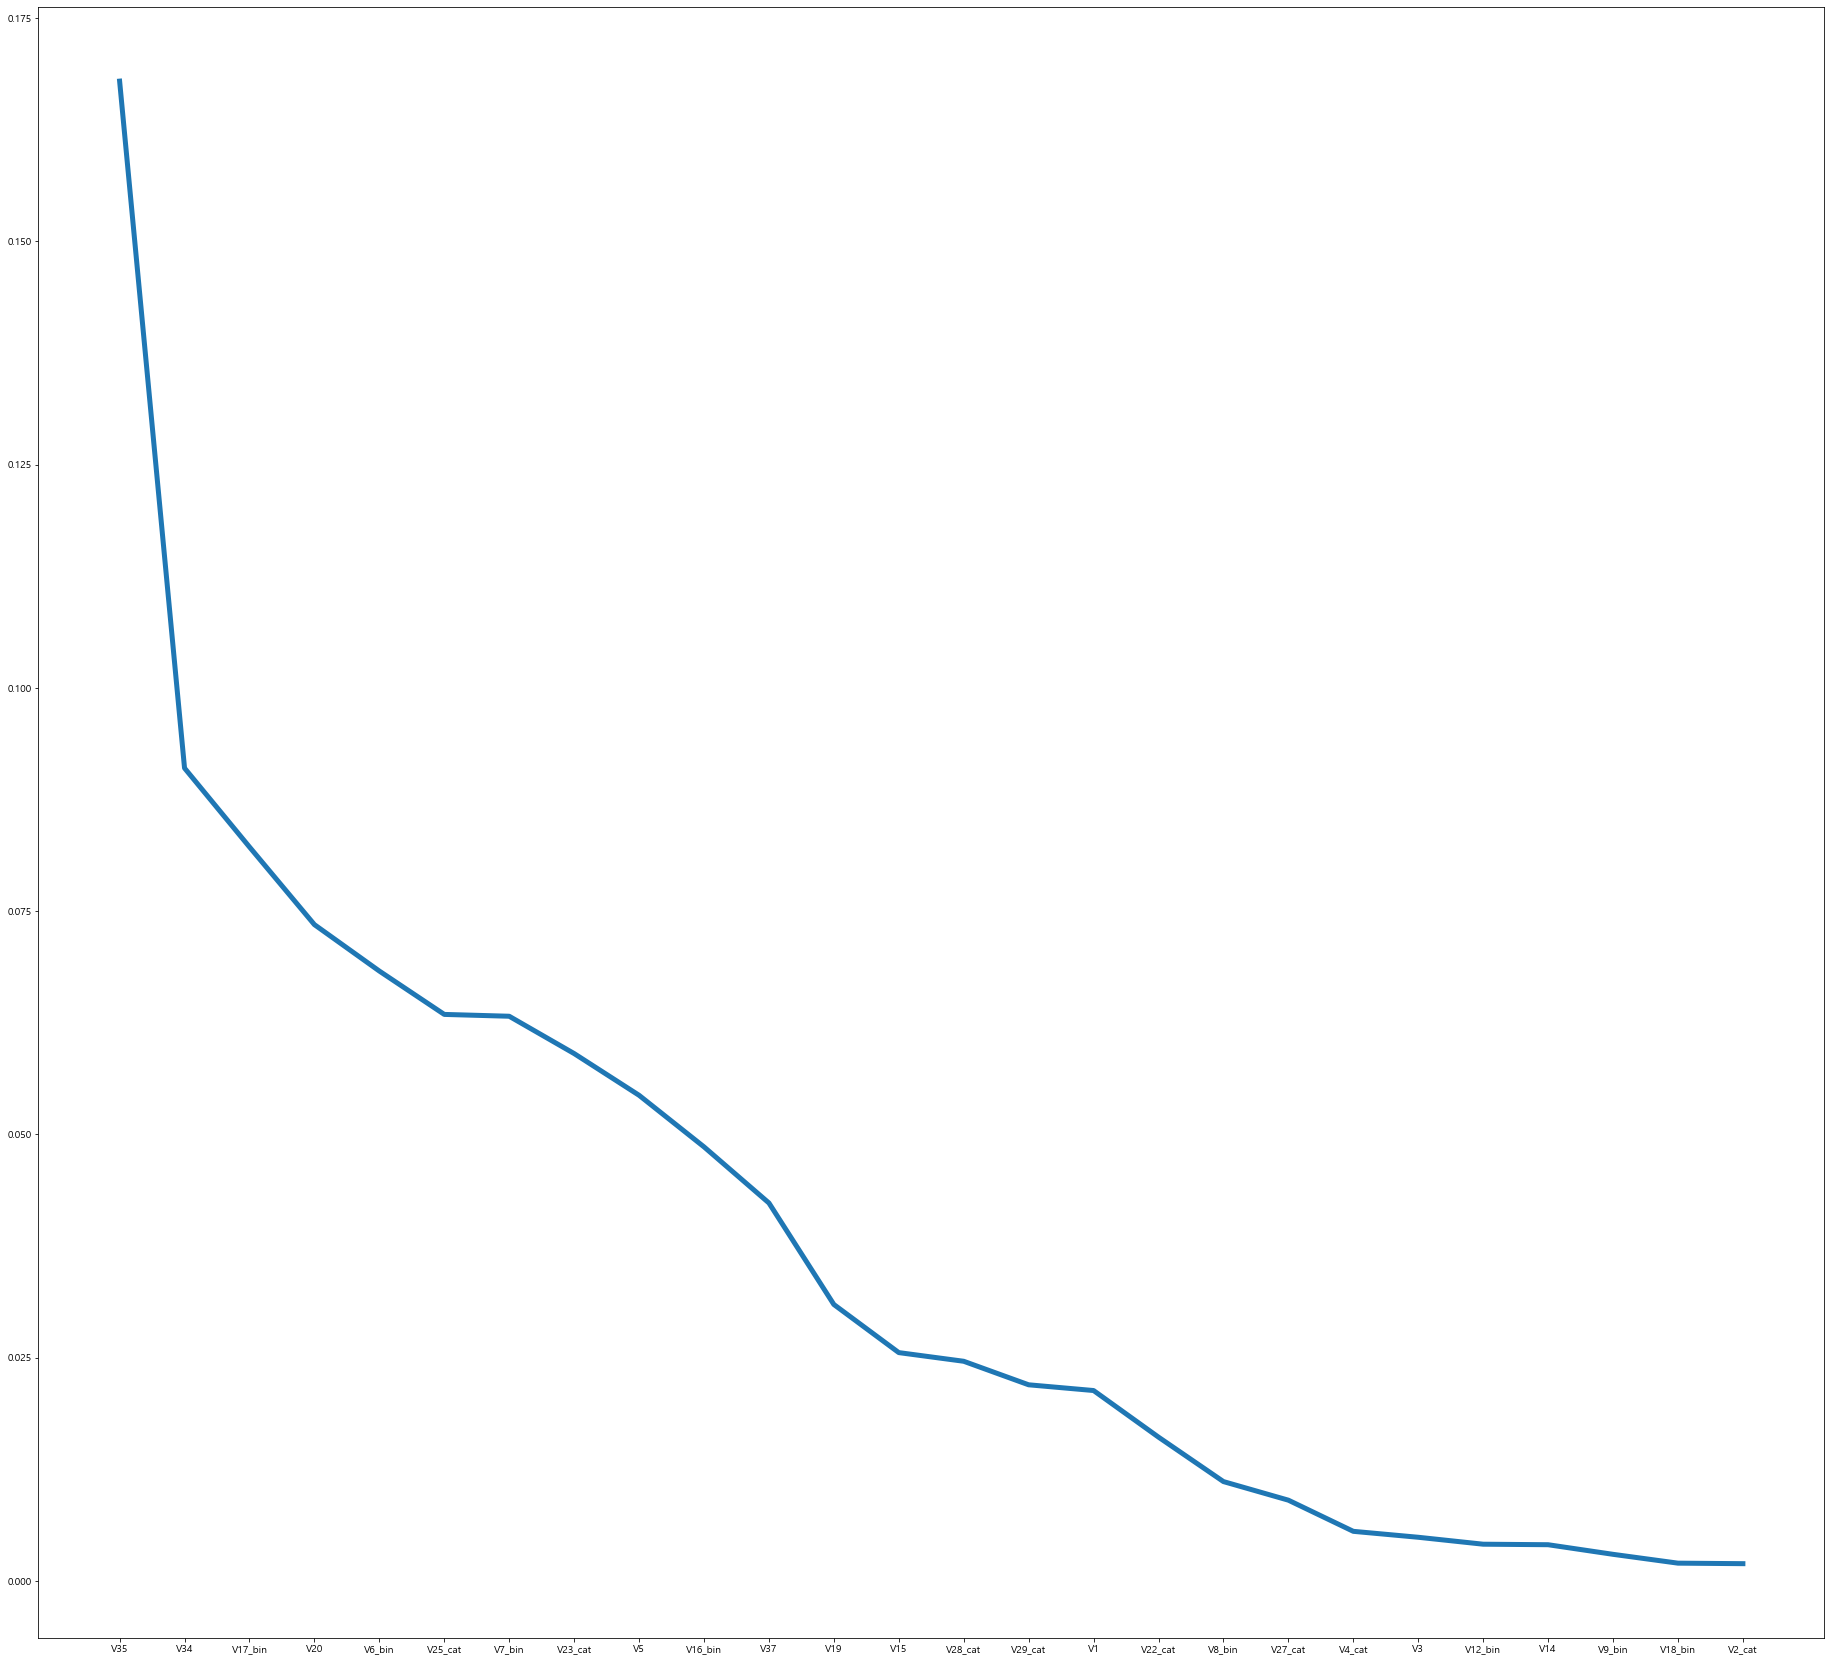

In [25]:
from sklearn.feature_selection import SelectKBest,f_classif

selector2=SelectKBest(score_func=f_classif,k=26)
selected2=selector2.fit_transform(train,target)
all_names2=train.columns
selected_mask2=selector2.get_support()
selected_names2=all_names[selected_mask2]
scores2=pd.DataFrame()
scores2['f_classif']=selector2.scores_
scores2['support']=selector2.get_support()
scores2['feature']=train.columns
x2=scores2[scores2['support']==True]
x2=x2.sort_values('f_classif',ascending=False)
x2['ratio']=x2['f_classif']/sum(x2['f_classif'])

feature=x2['feature']
score=x2['f_classif']
ratio=x2['ratio']

plt.figure(figsize=(32,30))
#print(plt.plot(feature,score))
print(plt.plot(feature,ratio,linewidth='5'))

#print(x2)

In [14]:
x2.to_csv('feature importance.csv',encoding='CP949')